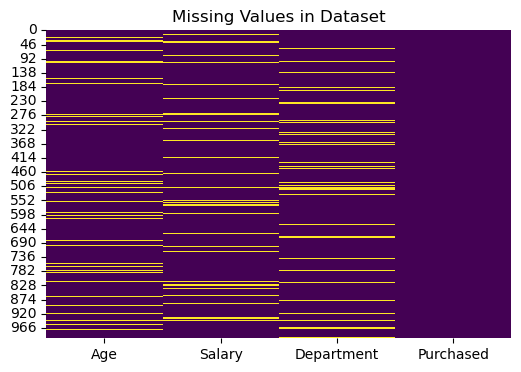

✅ Training Features Shape: (800, 6)
✅ Test Features Shape: (200, 6)

✅ Training Labels Distribution:
 Purchased
1    410
0    390
Name: count, dtype: int64

✅ Test Labels Distribution:
 Purchased
0    117
1     83
Name: count, dtype: int64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Create a large synthetic dataset
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'Age': np.random.randint(18, 60, size=n_samples),
    'Salary': np.random.normal(50000, 15000, size=n_samples),
    'Department': np.random.choice(['HR', 'Engineering', 'Marketing', 'Sales'], size=n_samples),
    'Purchased': np.random.choice([0, 1], size=n_samples)
})

# Step 2: Add missing values
for col in ['Age', 'Salary', 'Department']:
    data.loc[data.sample(frac=0.1).index, col] = np.nan

# Step 3: Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

# Step 4: Split features and target
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Step 5: Define preprocessing
numeric_features = ['Age', 'Salary']
categorical_features = ['Department']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # FIXED LINE
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 6: Transform the data
X_processed = preprocessor.fit_transform(X)

# Step 7: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Step 8: Output shapes and summary
print("✅ Training Features Shape:", X_train.shape)
print("✅ Test Features Shape:", X_test.shape)
print("\n✅ Training Labels Distribution:\n", y_train.value_counts())
print("\n✅ Test Labels Distribution:\n", y_test.value_counts())
